# 🌞 Solar Projects Clustering — County-Level Analysis  
### **Unsupervised ML | PCA | KMeans | EDA | Business Insights**

This project analyzes county-level solar installation data and groups counties into meaningful clusters.

### **Objectives**
- Understand solar system size and production patterns  
- Group counties by similar solar project characteristics  
- Identify high-potential regions for investment  
- Provide business recommendations for energy planning

---

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")
print("Libraries are imporetd")

Libraries are imporetd


## 2. Load The Data

In [2]:
data = pd.read_csv("Statewide Solar Projects.csv")
print("Data is Loaded")

Data is Loaded


In [3]:
print("\nColumn names")
data.columns


Column names


Index(['Data Through Date', 'Project ID', 'Interconnection Date', 'Utility',
       'City/Town', 'County', 'Zip', 'Division', 'Substation', 'Circuit ID',
       'Developer', 'Metering Method', 'Estimated PV System Size (kWdc)',
       'PV System Size (kWac)', 'Estimated Annual PV Energy Production (kWh)',
       'Energy Storage System Size (kWac)', 'Number of Projects'],
      dtype='object')

In [4]:
print("Shape of raw data:", data.shape)

Shape of raw data: (218115, 17)


In [5]:
data.head()

,Data Through Date,Project ID,Interconnection Date,Utility,City/Town,County,Zip,Division,Substation,Circuit ID,Developer,Metering Method,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Energy Storage System Size (kWac),Number of Projects
0,12/31/2023,SDG-66301,12/29/2023,Con Ed,Richmond Hill,Queens,11418.0,CENY-BK,Brownsville_2,9B05,Kamtech Solar Solutions,NM,6.05,5.17,7100,NaN,1
1,12/31/2023,SDG-66299,12/29/2023,Con Ed,Bronx,Bronx,10473.0,CENY-BX,Parkchester_2,5X67,Kamtech Solar Solutions,NM,6.74,5.76,7911,NaN,1
2,12/31/2023,SDG-66288,12/29/2023,Con Ed,Brooklyn,Kings,11225.0,CENY-BK,Bensonhurst_2,4B08,SUNCO,NM,3.05,2.61,3585,NaN,1
3,12/31/2023,SDG-66284,12/29/2023,Con Ed,Brooklyn,Kings,11236.0,CENY-BK,Bensonhurst_2,3037,Kamtech Solar Solutions,NM,5.62,4.80,6592,NaN,1
4,12/31/2023,SDG-66277,12/28/2023,Con Ed,Springfield Gardens,Queens,11413.0,CENY-Q,Jamaica,9112,Kamtech Solar Solutions,NM,6.05,5.17,7100,NaN,1


## 3. Basic EDA

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218115 entries, 0 to 218114
Data columns (total 17 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Data Through Date                            218115 non-null  object 
 1   Project ID                                   218112 non-null  object 
 2   Interconnection Date                         218115 non-null  object 
 3   Utility                                      218115 non-null  object 
 4   City/Town                                    218057 non-null  object 
 5   County                                       218115 non-null  object 
 6   Zip                                          218019 non-null  float64
 7   Division                                     132881 non-null  object 
 8   Substation                                   138171 non-null  object 
 9   Circuit ID                                   218085 non-nul

In [7]:
data.describe()

,Zip,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Energy Storage System Size (kWac),Number of Projects
count,218019.000000,218115.000000,218115.000000,2.181150e+05,4091.000000,218115.0
mean,11751.734473,24.507977,19.065451,2.876828e+04,32.174727,1.0
std,962.129108,291.525394,211.419642,3.422042e+05,296.161116,0.0
min,10001.000000,0.010000,0.010000,1.400000e+01,0.350000,1.0
25%,11220.000000,5.270000,4.500000,6.180000e+03,5.000000,1.0
50%,11717.000000,7.130000,6.090000,8.364000e+03,7.600000,1.0
75%,12018.000000,10.240000,8.750000,1.201700e+04,10.000000,1.0
max,14905.000000,43470.000000,31500.000000,5.102682e+07,5000.000000,1.0


In [8]:
data.isnull().sum()

Data Through Date                                   0
Project ID                                          3
Interconnection Date                                0
Utility                                             0
City/Town                                          58
County                                              0
Zip                                                96
Division                                        85234
Substation                                      79944
Circuit ID                                         30
Developer                                       10550
Metering Method                                   463
Estimated PV System Size (kWdc)                     0
PV System Size (kWac)                               0
Estimated Annual PV Energy Production (kWh)         0
Energy Storage System Size (kWac)              214024
Number of Projects                                  0
dtype: int64

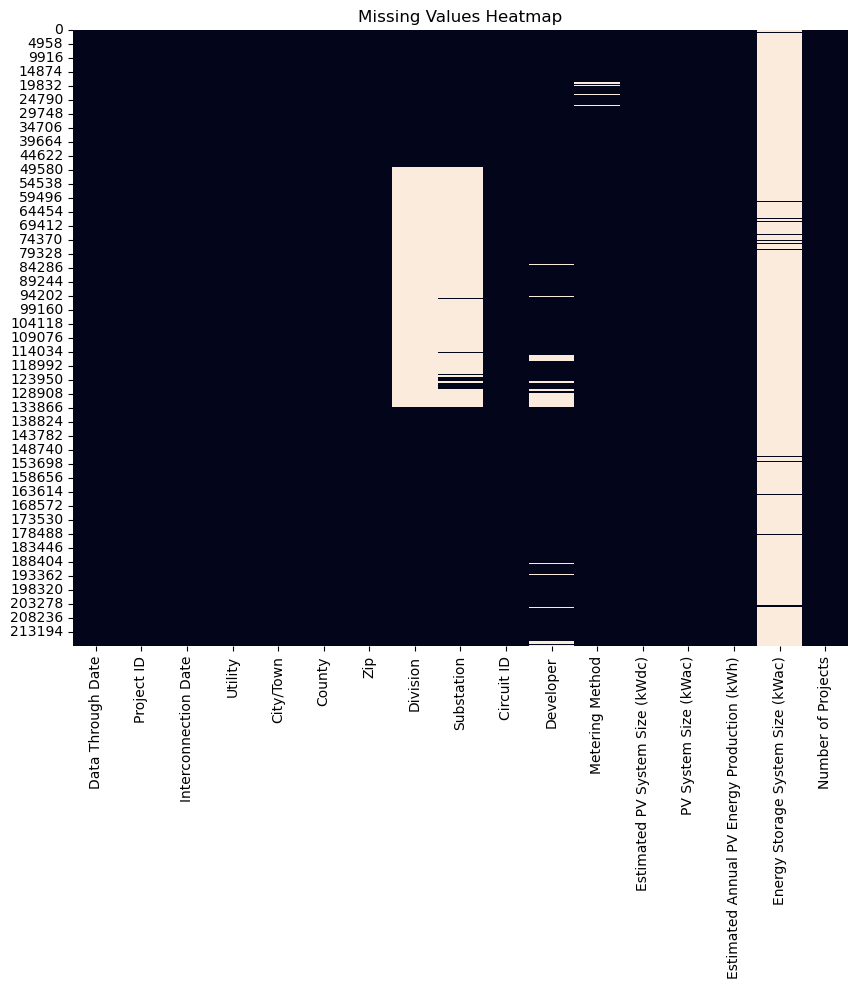

In [9]:
# Missing Values Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

# The dataset has severe missing data in non-essential categories.
# The core numeric variables used for clustering are clean.
# The categorical columns like City, Substation, Developer are not reliable.
# Clustering stability is good because the numeric features are complete.

In [10]:
data.dtypes.value_counts()

object     11
float64     4
int64       2
Name: count, dtype: int64

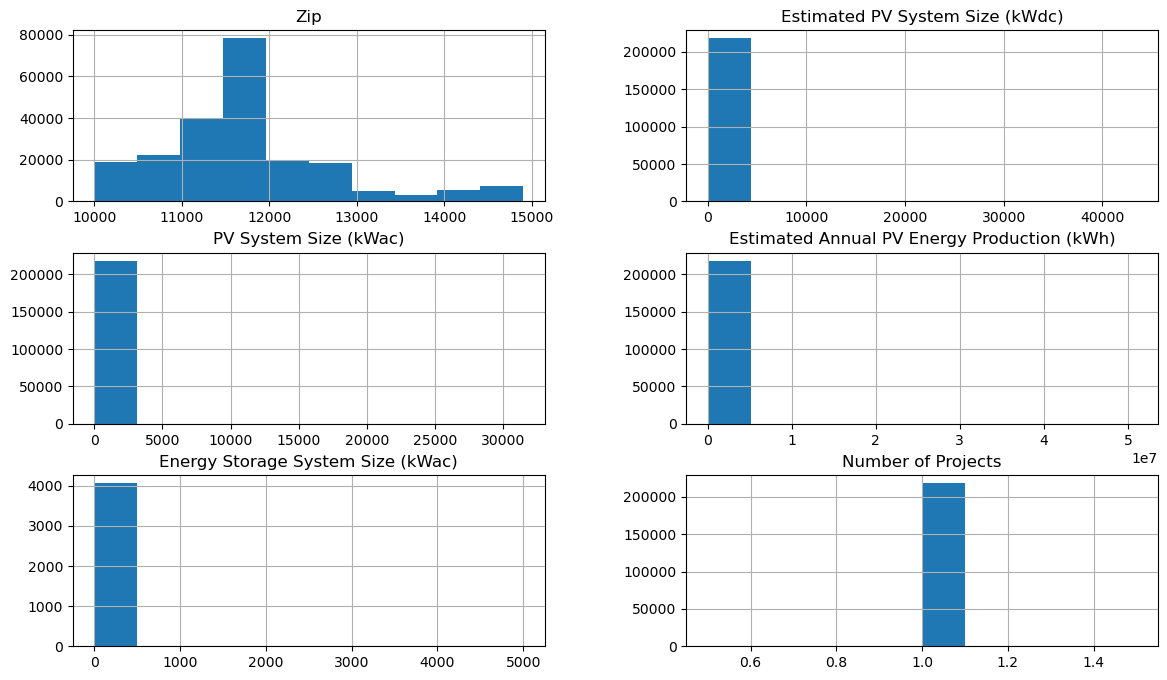

In [11]:
cols = data.select_dtypes(include=['int64','float64']).columns
data[cols].hist(figsize=(14,8))
plt.show()

## 4. Data Visualization

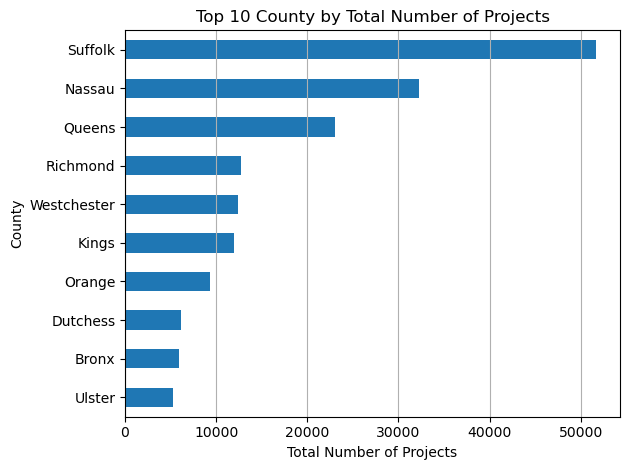

In [12]:
data_city = data.dropna(subset=['County']).copy()
top_cities = (
    data_city.groupby('County')['Number of Projects']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure()
top_cities.sort_values().plot(kind='barh')
plt.title('Top 10 County by Total Number of Projects')
plt.xlabel('Total Number of Projects')
plt.ylabel('County')
plt.tight_layout()
plt.grid(axis='x')
plt.show()

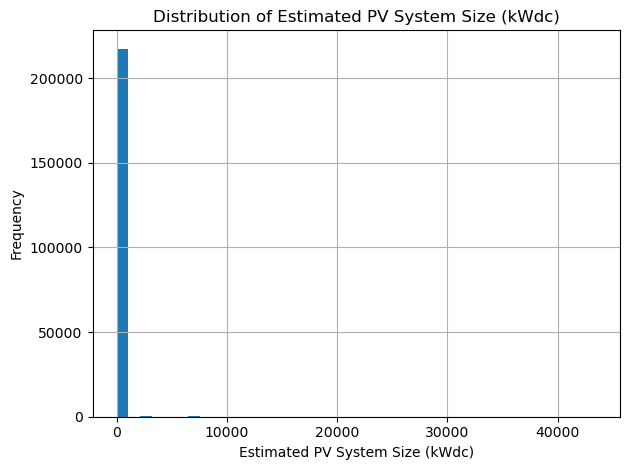

In [13]:
plt.figure()
data['Estimated PV System Size (kWdc)'].dropna().hist(bins=40)
plt.title('Distribution of Estimated PV System Size (kWdc)')
plt.xlabel('Estimated PV System Size (kWdc)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


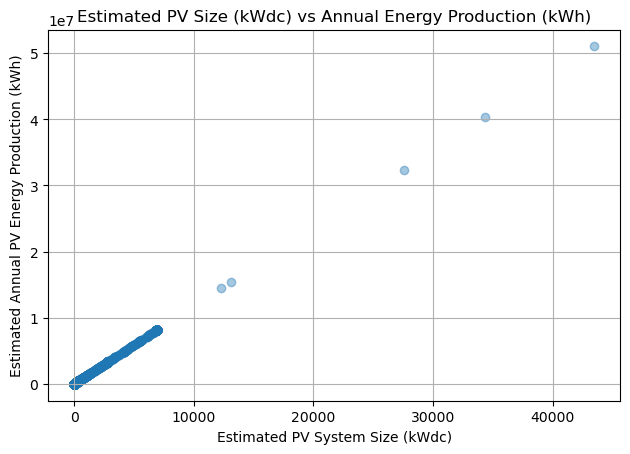

In [14]:
plt.figure()
plt.scatter(
    data['Estimated PV System Size (kWdc)'],
    data['Estimated Annual PV Energy Production (kWh)'],
    alpha=0.4
)
plt.title('Estimated PV Size (kWdc) vs Annual Energy Production (kWh)')
plt.xlabel('Estimated PV System Size (kWdc)')
plt.ylabel('Estimated Annual PV Energy Production (kWh)')
plt.grid(True)
plt.tight_layout()
plt.show()


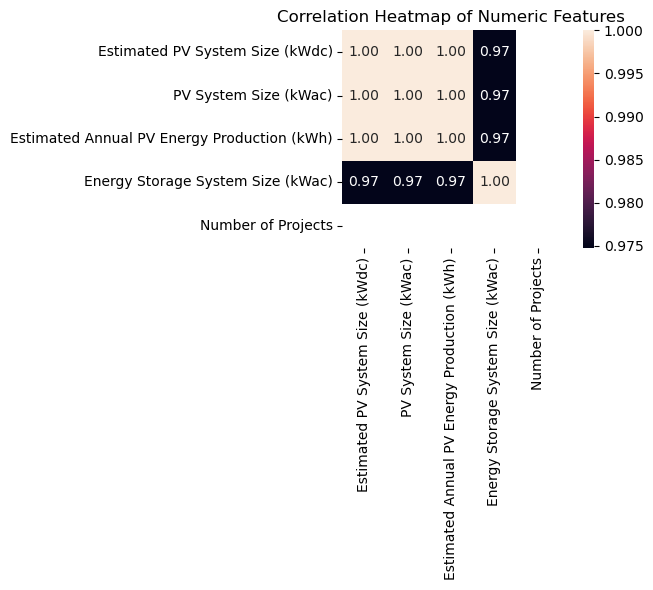

In [15]:
num_cols = [
    'Estimated PV System Size (kWdc)',
    'PV System Size (kWac)',
    'Estimated Annual PV Energy Production (kWh)',
    'Energy Storage System Size (kWac)',
    'Number of Projects'
]

corr = data[num_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", square=True)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

## 5. Handling Missing Values

In [16]:
data['County'].unique()

array(['Queens', 'Bronx', 'Kings', 'Richmond', 'Westchester', 'Nassau',
       'New York', 'Putnam', 'Suffolk', 'Rockland', 'Orange', 'Sullivan',
       'Ulster', 'Albany', 'Dutchess', 'Greene', 'Columbia', 'Schoharie',
       'Saratoga', 'Schenectady', 'Fulton', 'Rensselaer', 'Niagara',
       'Erie', 'Oswego', 'Jefferson', 'Monroe', 'St Lawrence', 'Warren',
       'Onondaga', 'Livingston', 'Washington', 'Ontario', 'Cattaraugus',
       'Herkimer', 'Genesee', 'Essex', 'Oneida', 'Cortland', 'Orleans',
       'Madison', 'Allegany', 'Montgomery', 'Franklin', 'Chautauqua',
       'Hamilton', 'Lewis', 'Wyoming', 'Cayuga', 'Clinton', 'Otsego',
       'Tompkins', 'Delaware', 'Steuben', 'Broome', 'Chenango', 'Wayne',
       'Seneca', 'Chemung', 'Tioga', 'Yates', 'Schuyler'], dtype=object)

In [17]:
data['County'] = (
    data['County']
    .astype(str)
    .str.strip()
    .str.title()
)

## 6. Select Features For County Aggregation

In [18]:
num_cols = [
    'Estimated PV System Size (kWdc)',
    'PV System Size (kWac)',
    'Estimated Annual PV Energy Production (kWh)',
    'Energy Storage System Size (kWac)',
    'Number of Projects'
]

# Check if all required columns exist

missing = [c for c in num_cols if c not in data.columns]
if missing:
    raise ValueError(f"These expected columns are missing from the CSV: {missing}")

# Take only relevant columns plus County

data_sub = data[['County'] + num_cols].copy()

# Handle missing values in numeric columns:
# - For storage size, NaN usually means no storage → fill with 0
# - For others, filled with median

data_sub['Energy Storage System Size (kWac)'] = data_sub['Energy Storage System Size (kWac)'].fillna(0)

for col in ['Estimated PV System Size (kWdc)',
            'PV System Size (kWac)',
            'Estimated Annual PV Energy Production (kWh)',
            'Number of Projects']:
    median_val = data_sub[col].median()
    data_sub[col] = data_sub[col].fillna(median_val)

data_sub.head()

,County,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Energy Storage System Size (kWac),Number of Projects
0,Queens,6.05,5.17,7100,0.0,1
1,Bronx,6.74,5.76,7911,0.0,1
2,Kings,3.05,2.61,3585,0.0,1
3,Kings,5.62,4.80,6592,0.0,1
4,Queens,6.05,5.17,7100,0.0,1


## 7. Aggregate to County level
- We aggregated data at the county level to remove city-level noise and get cleaner, more consistent patterns.

In [19]:
agg_dict = {
    'Estimated PV System Size (kWdc)': 'mean',
    'PV System Size (kWac)': 'mean',
    'Estimated Annual PV Energy Production (kWh)': 'mean',
    'Energy Storage System Size (kWac)': 'mean',
    'Number of Projects': 'sum'  
}

data_County = data_sub.groupby('County').agg(agg_dict).reset_index()

print("Number of unique County:", data_County.shape[0])
data_County.head()

Number of unique County: 62


,County,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Energy Storage System Size (kWac),Number of Projects
0,Albany,22.675800,17.871205,26617.785846,0.128319,4324
1,Allegany,406.374687,295.763063,477018.456250,0.083750,160
2,Bronx,12.019712,9.959863,14108.812711,0.518889,5932
3,Broome,59.237961,44.623493,69535.482270,0.291844,564
4,Cattaraugus,181.142733,132.613168,212633.003106,0.115528,322


## Log-Transforming the columns
- After log transform:
- KMeans becomes stable
- Elbow method becomes clear
- PCA plot shows clean separation
- Clusters become meaningful

In [20]:
log_cols = [
    'Estimated PV System Size (kWdc)',
    'PV System Size (kWac)',
    'Estimated Annual PV Energy Production (kWh)',
    'Energy Storage System Size (kWac)',
    'Number of Projects'
]

data_County_log = data_County.copy()

for col in log_cols:
    data_County_log[col] = np.log1p(data_County_log[col])

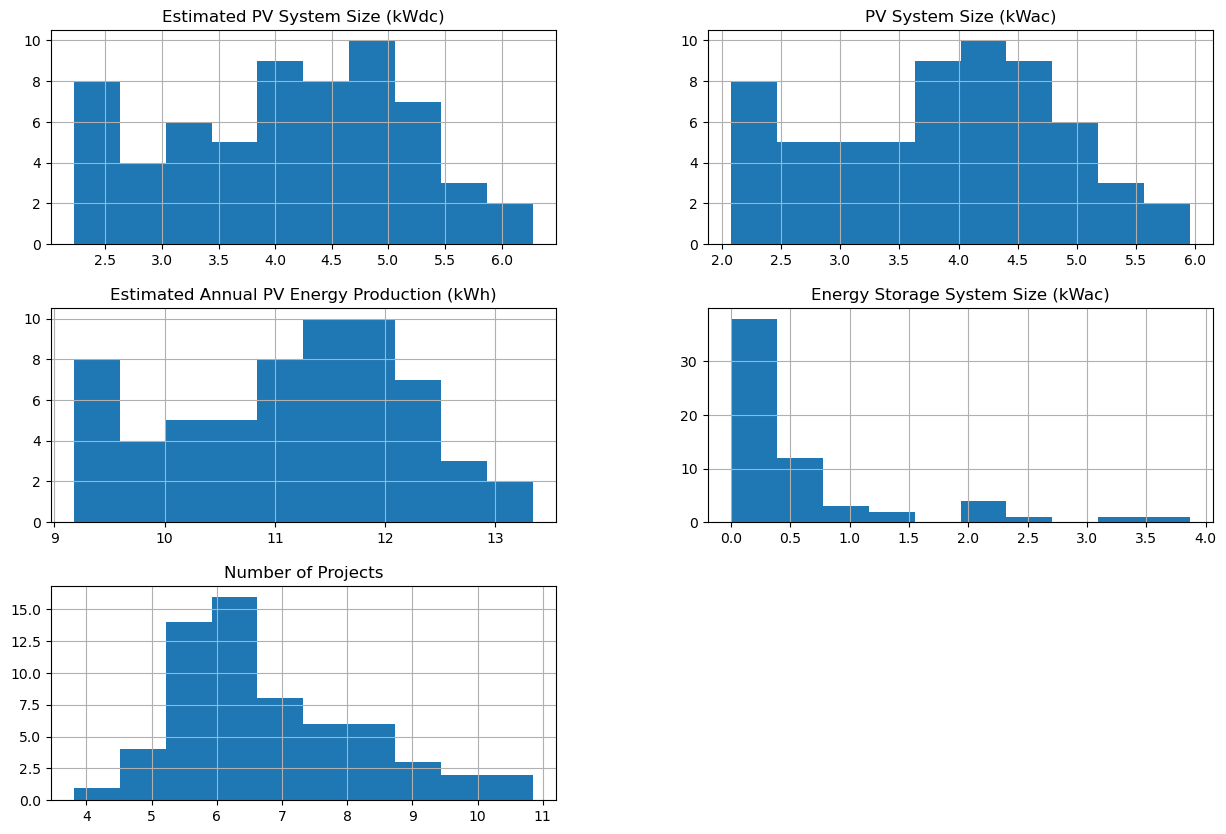

In [21]:
data_County_log[log_cols].hist(figsize=(15,10))
plt.show()

## 8. Feature Scaling

### why **MinMaxScaler**
- MinMaxScaler keeps all features in a uniform 0–1 range, which improves distance accuracy in K-Means and gives cleaner clusters.

### why not **StandardScaler**
- StandardScaler assumes the data is normally distributed, but my features were skewed.
  MinMaxScaler preserves the distribution and works better for K-Means

In [22]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_County_log[log_cols])

# 9. Elbow method to choose K

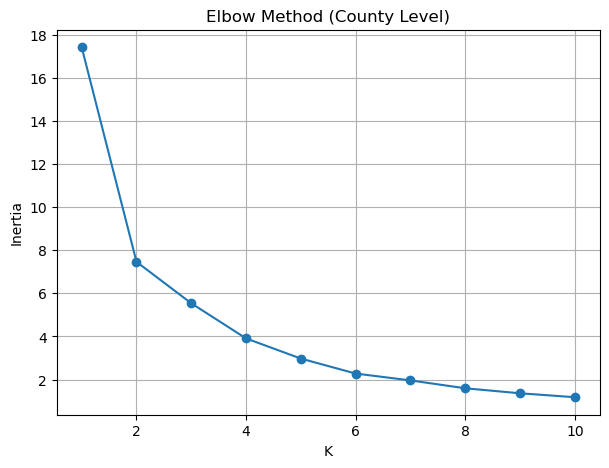

In [23]:
# to choose the optimal number of clusters (k).
# K-Means needs you to manually specify k. Elbow gives you a data-driven choice.

inertias = []
K = range(1,11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertias.append(km.inertia_)

plt.figure(figsize=(7,5))
plt.plot(K, inertias, marker='o')
plt.title("Elbow Method (County Level)")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


## 10. Find Best K Using Silhouette Score

In [24]:
sil_scores = {}

for k in range(2,8):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(scaled_data)
    sil_scores[k] = silhouette_score(scaled_data, labels)
    print(f"k={k} → silhouette={sil_scores[k]:.3f}")

best_k = max(sil_scores, key=sil_scores.get)
best_k

k=2 → silhouette=0.485
k=3 → silhouette=0.392
k=4 → silhouette=0.399
k=5 → silhouette=0.380
k=6 → silhouette=0.412
k=7 → silhouette=0.414


2

## 10.Final K-Means Model

### short answer Why K=2?

- Because k=2 has the highest silhouette score (0.485).
- Clusters are better separated
- Cluster grouping is tighter
- This is the most stable number of clusters

In [25]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

data_County_log['Cluster'] = clusters
data_County_log.head()

,County,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Energy Storage System Size (kWac),Number of Projects,Cluster
0,Albany,3.164453,2.937637,10.189372,0.120729,8.372167,0
1,Allegany,6.009733,5.692934,13.075313,0.080427,5.081404,1
2,Bronx,2.566464,2.394240,9.554626,0.417979,8.688285,0
3,Broome,4.098303,3.820423,11.149607,0.256071,6.336826,1
4,Cattaraugus,5.204791,4.894949,12.267328,0.109328,5.777652,1


## 11.Analyse Cluster Characterstics

In [26]:
features = [
    'Estimated PV System Size (kWdc)',
    'PV System Size (kWac)',
    'Estimated Annual PV Energy Production (kWh)',
    'Energy Storage System Size (kWac)',
    'Number of Projects'
]

cluster_profile = data_County_log.groupby('Cluster')[features].mean()
cluster_profile_real = np.expm1(cluster_profile)
cluster_profile_real

,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Energy Storage System Size (kWac),Number of Projects
Cluster,,,,,
0,18.064698,14.661219,21053.149868,0.410498,3156.368809
1,117.107148,86.893047,137278.264925,0.942979,429.791942


## 12. PCA For 2D Visualization

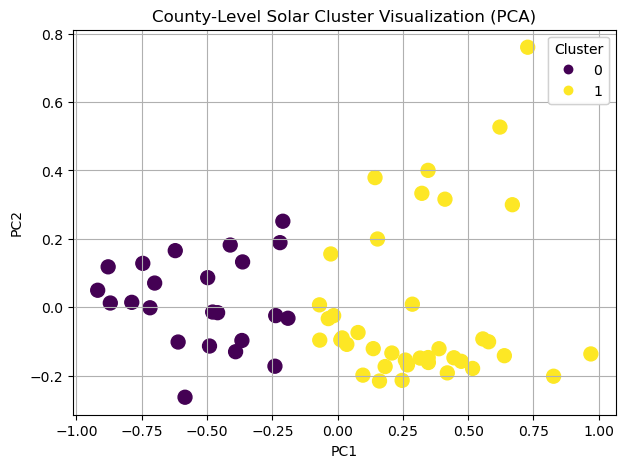

In [27]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(7,5))

# Scatter plot Because plt.scatter() does NOT automatically create a legend for numeric cluster labels.
scatter = plt.scatter(
    pca_data[:, 0],
    pca_data[:, 1],
    c=data_County_log['Cluster'],
    cmap='viridis',
    s=100
)

# Create legend
legend1 = plt.legend(*scatter.legend_elements(),
                     title="Cluster")
plt.gca().add_artist(legend1)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("County-Level Solar Cluster Visualization (PCA)")
plt.grid(True)
plt.show()

In [28]:
data_County_log['Cluster'].value_counts()

Cluster
1    39
0    23
Name: count, dtype: int64

## **Cluster 0 — Residential Solar Counties (23 counties)**
- Smaller PV system sizes
- Lower annual energy output
- Very high number of installations
- Represents residential / rooftop / small-business solar
- Ideal for home battery programs and community solar

## **Cluster 1 — Commercial & Utility Solar Counties (39 counties)**
- Much larger PV system sizes
- High annual energy generation
- Fewer installations but more powerful systems
- Represents commercial, municipal, and utility-scale solar
- Ideal for grid-level storage and industrial solar projects

## **Business Insight:**

- These counties are ideal for large solar farms,
- Grid-level storage,
- Commercial-scale expansion,
- Partnerships with utilities & government.

<div style="background-color:#f0f0f0; padding:15px; color:#2e86c1; font-size:24px; font-weight:bold; text-align:center;">
    <b>Thank you<b/>
</div>